In [1]:
##IDEA FOR THIS PROJECT CAME FROM https://github.com/kaanatmacaa/spotify_recommendation_system/blob/master/cs210_project.ipynb


import random
import numpy as np
import pandas as pd
import ast
import re
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import string
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
song_data = pd.read_csv('/trackscombineClean.csv')

In [80]:
song_data.columns = song_data.columns.str.lower()

In [4]:
song_data.columns

Index(['track uri', 'name', 'artists', 'album name', 'album artist name(s)',
       'album release date', 'disc number', 'track number', 'duration',
       'explicit', 'popularity', 'added at', 'genres', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time signature',
       'year'],
      dtype='object')

In [5]:
song_data.head()

,track uri,name,artists,album name,album artist name(s),album release date,disc number,track number,duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
0,3WSmNiDHpz3hgFketPiIKW,Fatal (feat. Drew Ryn),"wasbak, maeva carter, drew ryn",Fatal (feat. Drew Ryn),"Wasback, Maeva Carter, Drew Ryn",2018-12-17,1,1,208129,False,...,-4.818,0,0.0777,0.063000,0.000,0.867,0.225,127.727,4,2018
1,53Zb7M5ImIsCQZsIyh6Qcn,Out Of This World,"Beatsole, Dan Thompson",Out Of This World,"Beatsole, Dan Thompson",2019-11-15,1,1,218186,False,...,-3.472,0,0.1310,0.009700,0.864,0.497,0.212,131.983,4,2019
2,4ZruxHVwyYmPBbskuWaFbX,Dream Like I Do,"Darren Porter, Ana Criado",Dream Like I Do,"Darren Porter, Ana Criado",2019-07-26,1,1,206029,False,...,-7.523,0,0.1570,0.001270,0.443,0.117,0.191,136.010,4,2019
3,0C8czD6DMKKPnPglj1HhrP,Character - Avao Remix,"Mark Sixma, Avao",The World of Six (Incl. Bonus Remixes),Mark Sixma,2020-01-24,1,5,180643,False,...,-5.370,1,0.0600,0.000933,0.907,0.149,0.217,200.991,3,2020
4,5rfqMfC6QWx65v1aXjFQQr,GDL,Allen Watts,GDL,Allen Watts,2020-01-03,1,1,172288,False,...,-4.400,0,0.1020,0.002040,0.928,0.587,0.117,137.963,4,2020


In [6]:
song_data.describe()

,disc number,track number,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,1.009153,3.911518,208000.301297,34.860412,0.640367,0.726154,5.222731,-6.843354,0.533181,0.127047,0.125824,0.185328,0.223142,0.334877,126.606763,3.961861,2017.899314
std,0.110136,5.832244,68976.125869,24.453343,0.161670,0.190509,3.608404,2.634618,0.499088,0.116450,0.191362,0.321243,0.176221,0.220109,23.038239,0.287252,3.830443
min,1.000000,1.000000,77832.000000,0.000000,0.050300,0.065100,0.000000,-21.353000,0.000000,0.025300,0.000003,0.000000,0.038800,0.026000,47.811000,1.000000,1975.000000
25%,1.000000,1.000000,162972.500000,10.000000,0.520000,0.590000,2.000000,-8.009000,0.000000,0.045000,0.004735,0.000000,0.104500,0.155500,116.988000,4.000000,2017.000000
50%,1.000000,1.000000,200173.000000,39.000000,0.640000,0.752000,5.000000,-6.488000,1.000000,0.070400,0.033400,0.000490,0.145000,0.294000,128.003000,4.000000,2019.000000
75%,1.000000,5.000000,233182.000000,53.000000,0.771000,0.885000,8.000000,-5.083000,1.000000,0.181000,0.169000,0.200000,0.312500,0.478000,138.001500,4.000000,2020.000000
max,3.000000,56.000000,658310.000000,92.000000,0.973000,0.999000,11.000000,-1.048000,1.000000,0.898000,0.949000,0.986000,0.974000,0.965000,203.983000,5.000000,2022.000000


In [7]:
print("Number of rows (samples) are:", song_data.shape[0], "rows")
print("Number of columns (features) are:", song_data.shape[1], "columns")
song_data.shape

Number of rows (samples) are: 1311 rows
Number of columns (features) are: 26 columns


(1311, 26)

In [8]:
print("Feature types and counts:")
song_data.info()

Feature types and counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track uri             1311 non-null   object 
 1   name                  1311 non-null   object 
 2   artists               1311 non-null   object 
 3   album name            1311 non-null   object 
 4   album artist name(s)  1311 non-null   object 
 5   album release date    1311 non-null   object 
 6   disc number           1311 non-null   int64  
 7   track number          1311 non-null   int64  
 8   duration              1311 non-null   int64  
 9   explicit              1311 non-null   bool   
 10  popularity            1311 non-null   int64  
 11  added at              1311 non-null   object 
 12  genres                1249 non-null   object 
 13  danceability          1311 non-null   float64
 14  energy                1311 non-null   float64


### Data Cleanup

In [9]:
song_data.isna()

,track uri,name,artists,album name,album artist name(s),album release date,disc number,track number,duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Cleanup the Artist Names

In [10]:
def clean_artist_name(artist_name):
  artist_name = artist_name.replace('[', '')
  artist_name = artist_name.replace(']', '')
  artist_name = artist_name.replace('"', '')
  artist_name = artist_name.replace('\'','')
  return artist_name

song_data["artists"] = song_data['artists'].apply(clean_artist_name)

In [11]:
song_data.head(5)[["artists", "name", "genres", "year"]]

,artists,name,genres,year
0,"wasbak, maeva carter, drew ryn",Fatal (feat. Drew Ryn),sky room,2018
1,"Beatsole, Dan Thompson",Out Of This World,"progressive house,progressive trance,russian t...",2019
2,"Darren Porter, Ana Criado",Dream Like I Do,"progressive trance,progressive uplifting tranc...",2019
3,"Mark Sixma, Avao",Character - Avao Remix,"dutch trance,pop dance,progressive house,progr...",2020
4,Allen Watts,GDL,"progressive house,progressive trance,progressi...",2020


### Feature Vizualizations

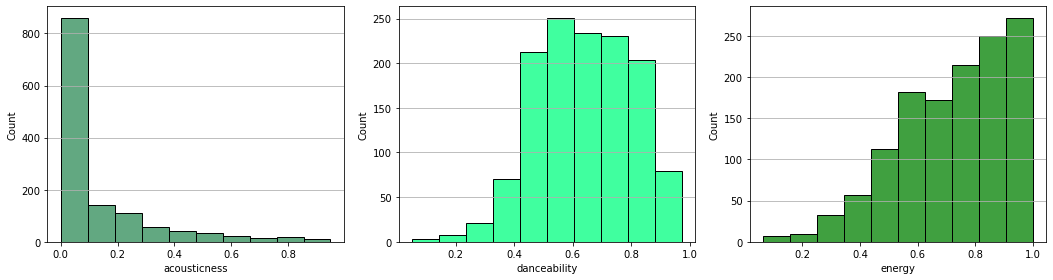

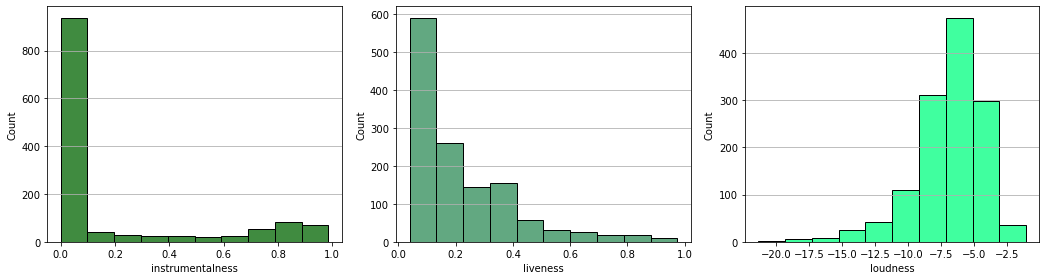

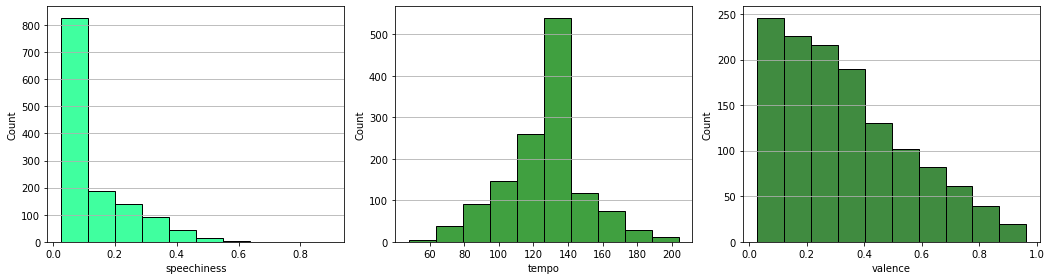

In [12]:
plt.figure(figsize=(44,4))
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
colors = ["seagreen", "springgreen", "green", "darkgreen", "seagreen", "springgreen", "springgreen", "green", "darkgreen"]
for i in range(len(attrs)):
  plt.grid(axis="y")
  plt.subplot(1, len(attrs), i+1)
  sns.histplot(song_data[attrs[i]], bins=10, color = colors[i])
  if i == 2 or i == 5:
    plt.tight_layout()
    plt.grid(axis="y")
    plt.show()
    plt.figure(figsize=(43.15,4))
  
plt.tight_layout()
plt.grid(axis="y")
plt.show()

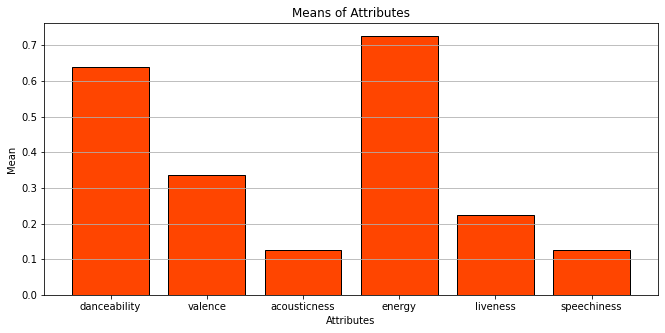

In [13]:
acc = song_data["acousticness"].mean()
liv = song_data["liveness"].mean()
ene = song_data["energy"].mean()
dan = song_data["danceability"].mean()
spe = song_data["speechiness"].mean()
val = song_data["valence"].mean()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'orangered', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Mean')
plt.title("Means of Attributes")
plt.grid(axis="y")
plt.show()

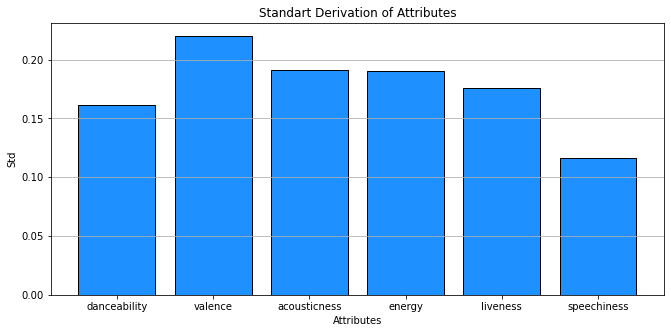

In [14]:
acc = song_data["acousticness"].std()
liv = song_data["liveness"].std()
ene = song_data["energy"].std()
dan = song_data["danceability"].std()
spe = song_data["speechiness"].std()
val = song_data["valence"].std()

name_of_att = ["danceability", "valence", "acousticness", "energy","liveness",  "speechiness" ]
att = [ dan, val, acc, ene,liv,  spe]
plt.figure(figsize=(11,5)) 
plt.bar(name_of_att, att, color = 'dodgerblue', edgecolor="black")
  
plt.xlabel('Attributes')
plt.ylabel('Std')
plt.title("Standart Derivation of Attributes")
plt.grid(axis="y")
plt.show()

#### Correlation Scatter Plots

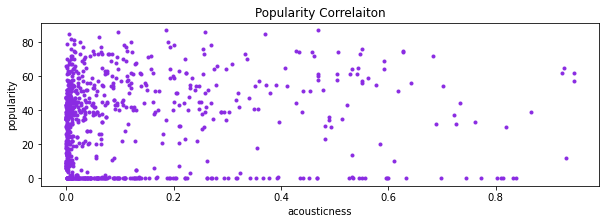

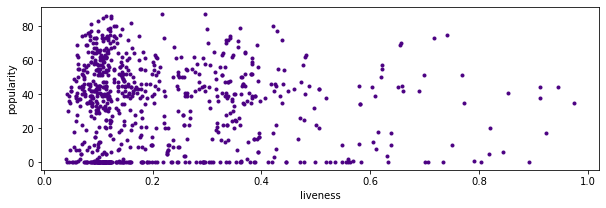

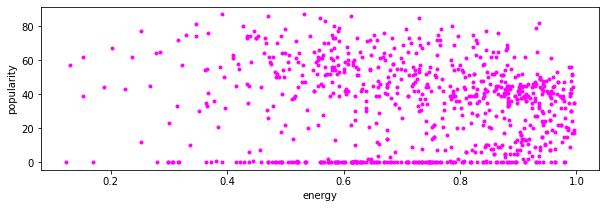

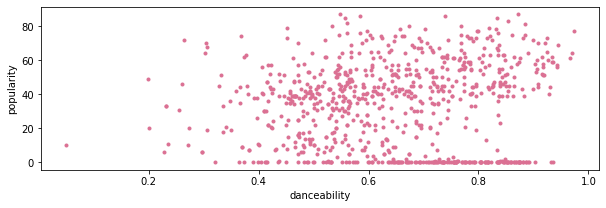

In [15]:
plt.figure(figsize=(10,3))
sample_data = song_data.sample(800)
plt.title("Popularity Correlaiton")
plt.scatter(sample_data["acousticness"], sample_data["popularity"], marker='.', color='blueviolet', label='ys1')
plt.xlabel("acousticness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["liveness"], sample_data["popularity"], marker='.', color='indigo', label='ys2')
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["energy"], sample_data["popularity"], marker='.', color='fuchsia', label='ys2')
plt.xlabel("energy")
plt.ylabel("popularity")
plt.show()

plt.figure(figsize=(10,3))
plt.scatter(sample_data["danceability"], sample_data["popularity"], marker='.', color='palevioletred', label='ys2')
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.show()

In [16]:
### Loudness and Energy

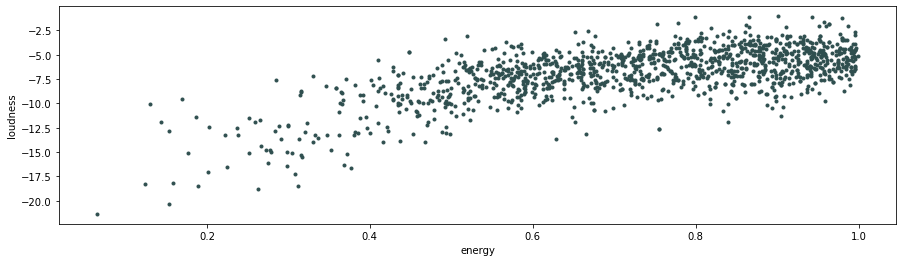

In [17]:
plt.figure(figsize=(15,4))
plt.scatter(song_data["energy"], song_data["loudness"], marker='.', color='darkslategray')
plt.xlabel("energy")
plt.ylabel("loudness")
plt.show()

### Negative Correlation Energy and Acousticness

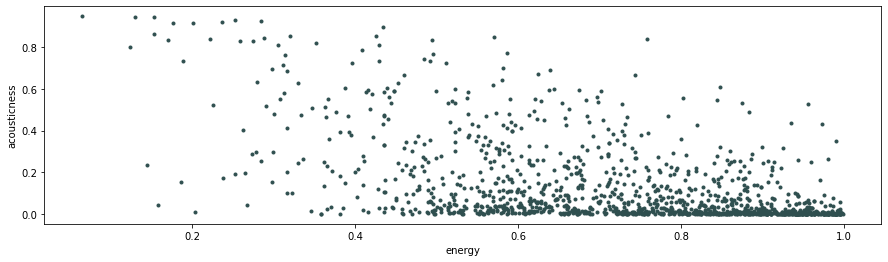

In [18]:
plt.figure(figsize=(15,4))
plt.scatter(song_data["energy"].head(50000), song_data["acousticness"].head(50000), marker='.', color='darkslategray', label='ys2')
plt.xlabel("energy")
plt.ylabel("acousticness")
plt.show()

### Correlation Matrix

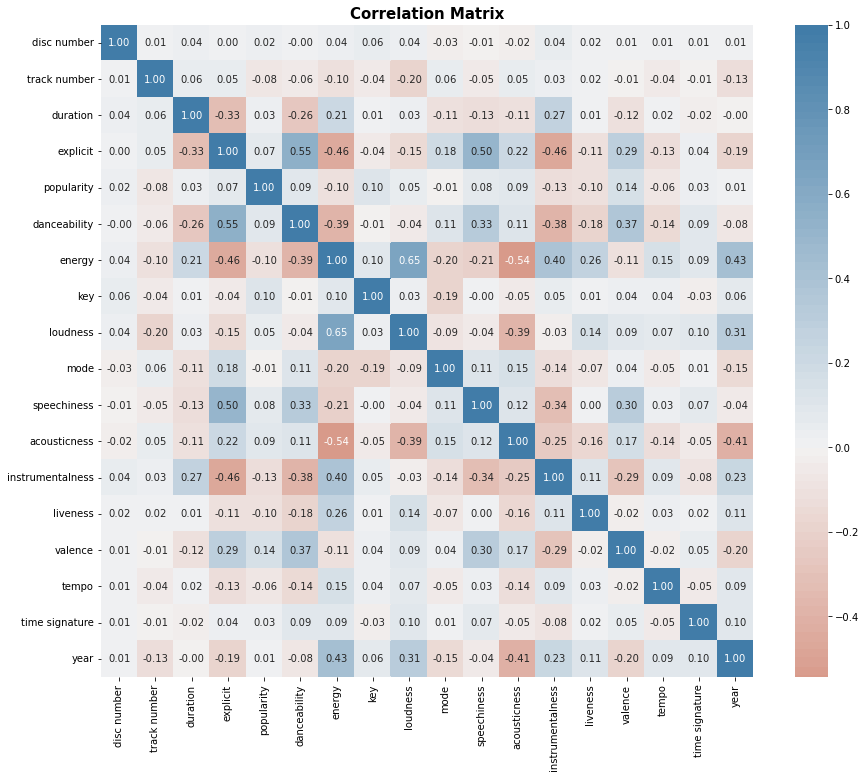

In [19]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 240, n=100)
corr = song_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f",  cmap=palette, square=True, center = 0)
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

### Most Popular Artist and Songs Analysis

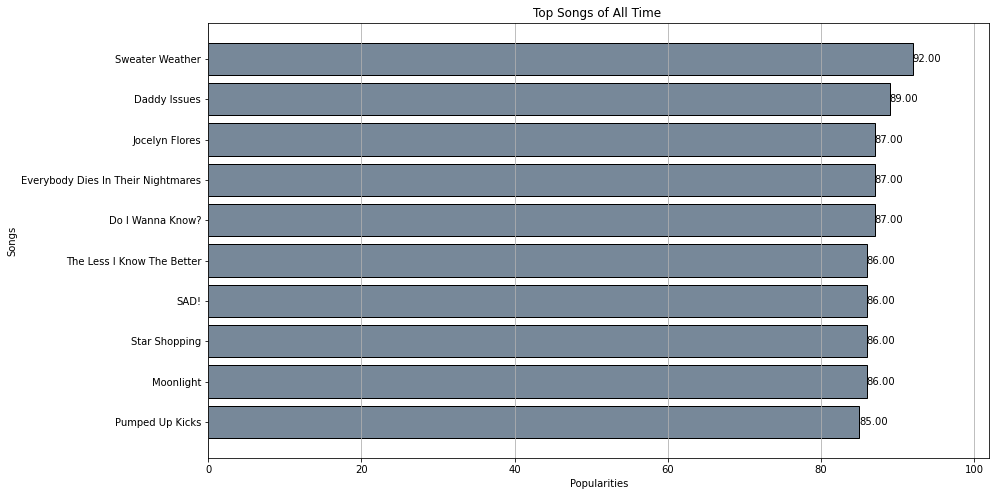

In [20]:
values = song_data.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = song_data.sort_values(by=["popularity"]).tail(10)["name"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color = "lightslategray", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Songs of All Time ")
plt.grid(axis="x")

plt.show()

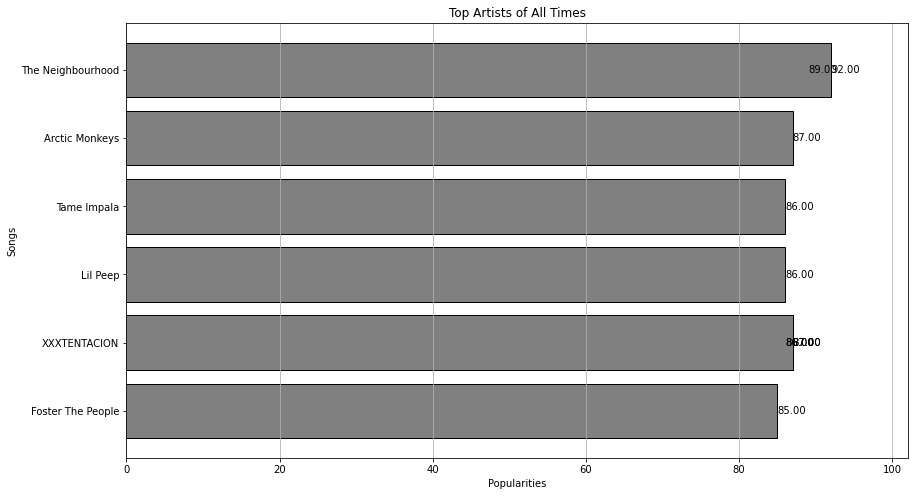

In [22]:
values = song_data.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
artists = song_data.sort_values(by=["popularity"]).tail(10)["artists"].to_list()
plt.figure(figsize=(14,8))
plt.barh(artists, values, color = "gray", edgecolor="black")

for value, cat in zip(values, artists):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Songs")
plt.title("Top Artists of All Times")
plt.grid(axis="x")
plt.show()

### User Input Section

In [ ]:
'''
year = int(input("Enter a year between 1920-2021: "))
while(year < 1920 or year > 2021):
  year = input("Wrong input. Please enter a year between 1920-2021: ")
df_filtered = song_data[song_data["year"] < 5 + year]
df_filtered = df_filtered[df_filtered["year"] > year - 5]
df_filtered = df_filtered.sort_values(by=['popularity'], ascending=False)

print("Top five songs of", year-5, "-", year+5, ":")
df_filtered[["name", "artists", "popularity", "album release date"]].head(5)
'''

### Features of Top 50 

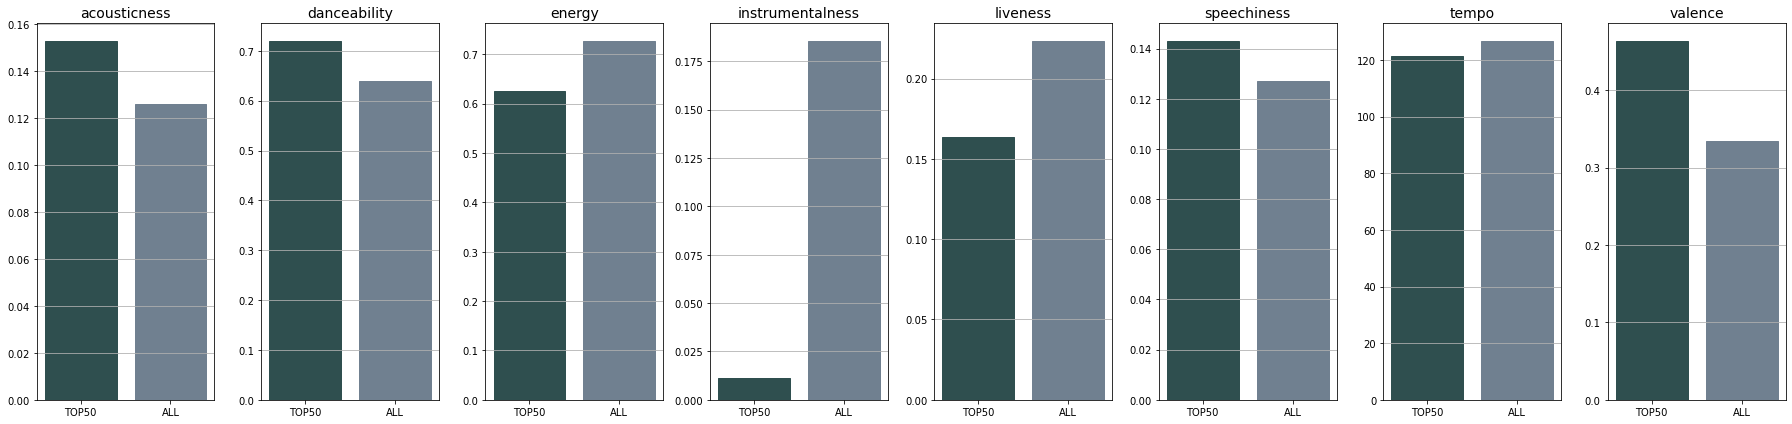

In [27]:
top_50 = song_data.sort_values(by=["popularity"]).tail(50)
attrs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]
plot_data = {x:[top_50[x].mean(), song_data[x].mean()] for x in attrs}
fig, axs = plt.subplots(1,8, figsize=(25,6))
colors = ["darkslategray", "slategray"]

for i in range(8):
  a = axs[i].bar(["TOP50","ALL"],plot_data[attrs[i]], edgecolor="black")
  a[0].set_color(colors[0])
  a[1].set_color(colors[1])
  axs[i].set_title(attrs[i], fontsize=14)
  axs[i].grid(axis="y")

plt.tight_layout()
plt.show()

### Taking a Look at Genres and Features over Time

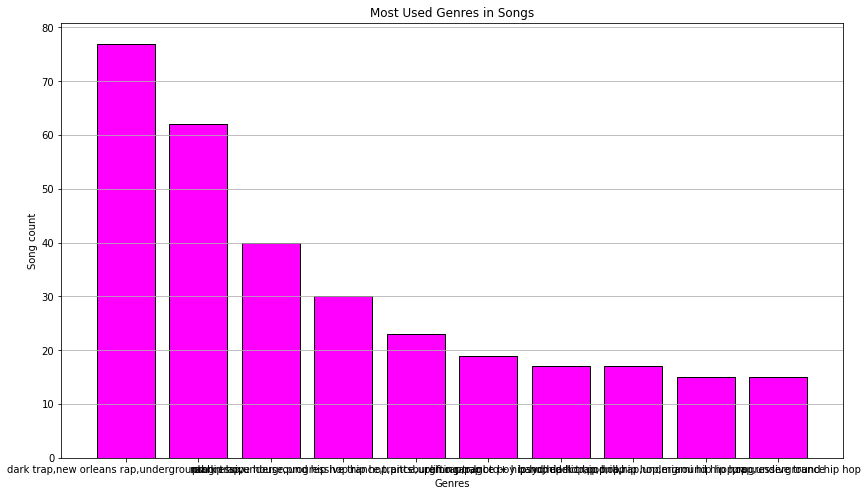

In [35]:
def get_mostused_genres():
  genre_popularities = {}
  for idx, song in song_data.iterrows():
    if len(str(song["genres"]))!=0:
      genres = str(song["genres"]).strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse() 
  for i in top_genres: 
    if i[0] == "" : 
      top_genres.remove(i)
  top_genres = top_genres[:10]
  return top_genres

top_genres=get_mostused_genres()
plt.figure(figsize=(14,8))
for i in top_genres:
  plt.bar(i[0], i[1], color="magenta",  edgecolor="black")

plt.xlabel("Genres")
plt.ylabel("Song count")
plt.title("Most Used Genres in Songs")
plt.grid(axis="y")
plt.show()

### Genres with the Most Popularity

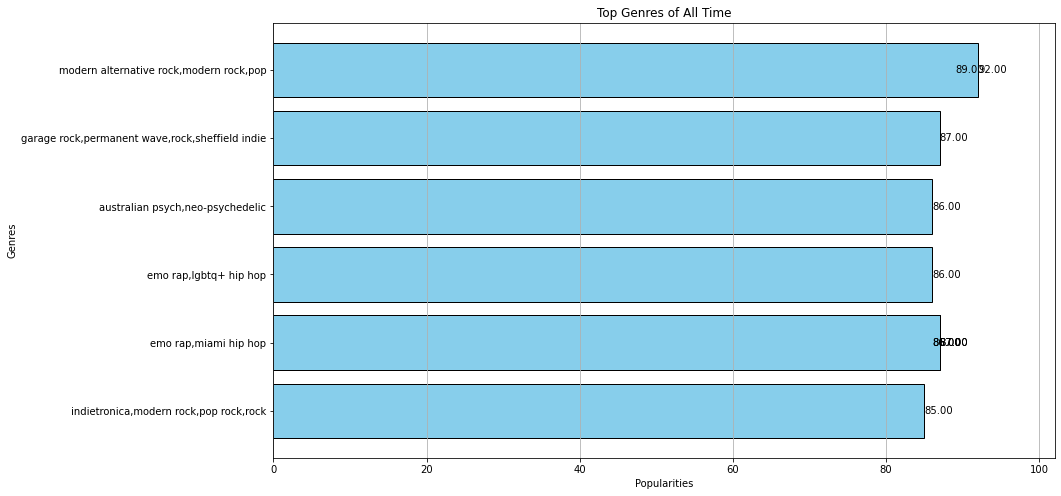

In [39]:
values = song_data.sort_values(by=["popularity"]).tail(10)["popularity"].to_list()
categories = song_data.sort_values(by=["popularity"]).tail(10)["genres"].to_list()
plt.figure(figsize=(14,8))
plt.barh(categories, values, color="skyblue", edgecolor="black")

for value, cat in zip(values, categories):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=10)

plt.xlim([0, max(values)+10])
plt.xlabel("Popularities")
plt.ylabel("Genres")
plt.title("Top Genres of All Time")
plt.grid(axis="x")
plt.show()

In [ ]:
### Genre Changes over Time

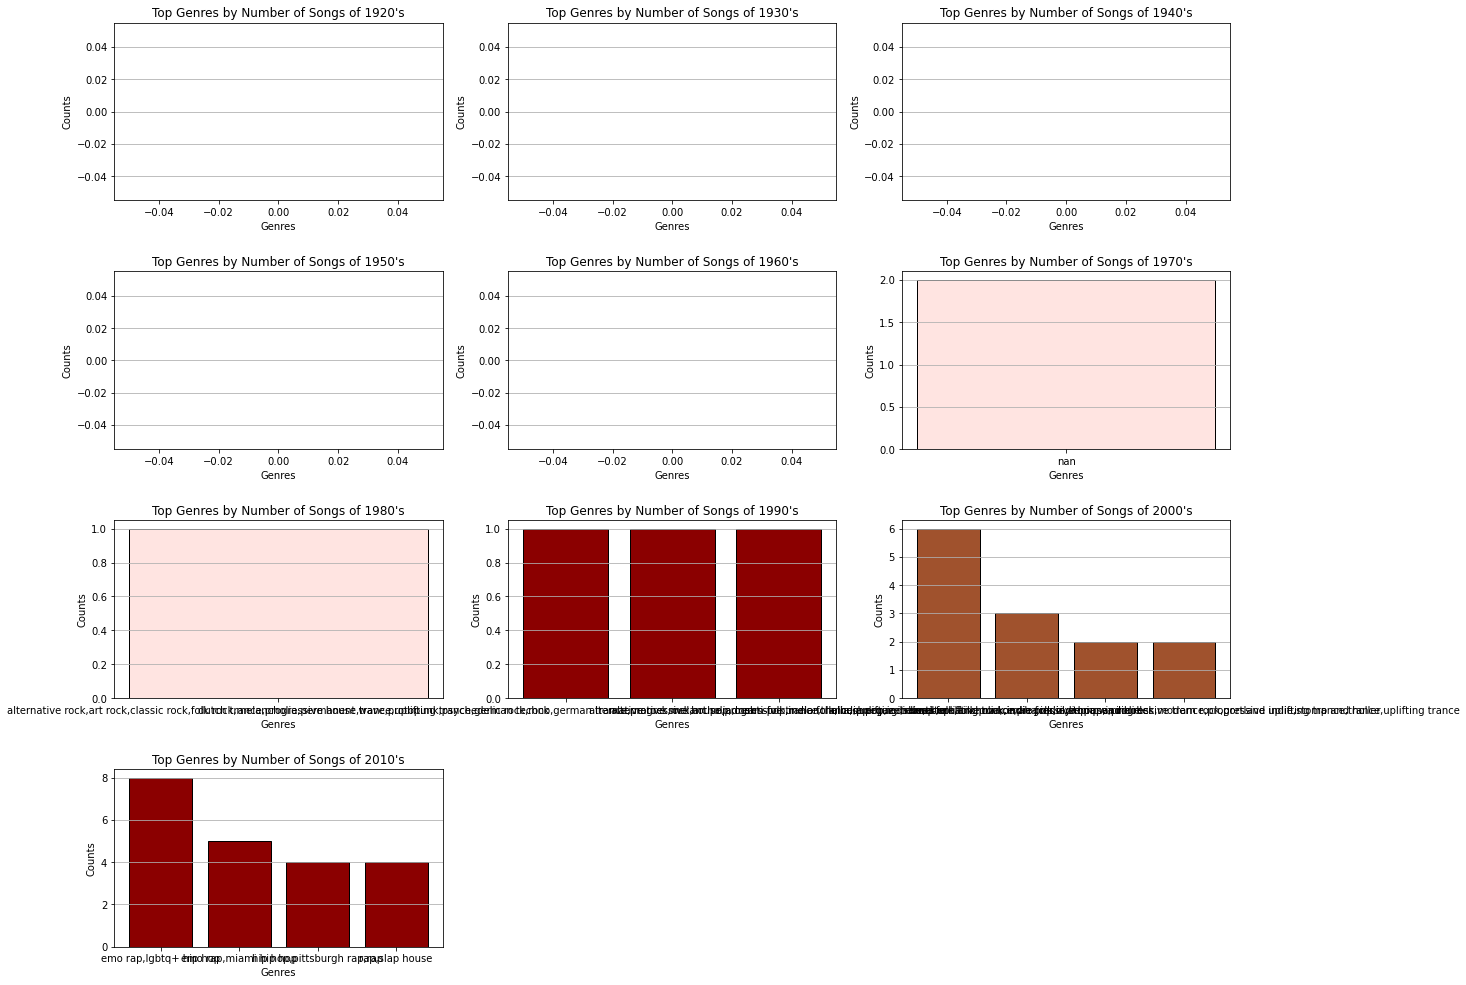

In [41]:
def get_popular_genres(year):
  df_top_songs = song_data[song_data["year"] < 5 + year]
  df_top_songs = df_top_songs[df_top_songs["year"] > year - 5]
  df_top_songs = df_top_songs.sort_values(by=['popularity'], ascending=False)
  df_top_songs = df_top_songs.head(100)

  genre_popularities = {}

  for idx, song in df_top_songs.iterrows():
    if len(str(song["genres"]))!=0:
      genres = str(song["genres"]).strip("[]'").split("', '")
      for g in genres:
        if g not in genre_popularities.keys():
          genre_popularities[g] = 1
        else:
          genre_popularities[g] += 1
  top_genres = list(sorted(genre_popularities.items(), key=lambda item: item[1]))
  top_genres.reverse()
  top_genres = top_genres[:4]

  return top_genres

colors = ["sienna", "mistyrose", "darkred", "darkred", "sienna", "mistyrose", "mistyrose", "darkred", "sienna", "darkred"]
fig, axs = plt.subplots(4,3,figsize=(20,17), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
for i in range(10):
  top_genres=get_popular_genres(1925 + i*10)
  genres = [x[0] for x in top_genres]
  counts = [x[1] for x in top_genres]
  axs[int(i/3), i%3].bar(genres, counts, color = colors[i], edgecolor="black")
  axs[int(i/3), i%3].set_title("Top Genres by Number of Songs of " + str(1920 + i*10) + "'s")
  axs[int(i/3), i%3].set_xlabel("Genres")
  axs[int(i/3), i%3].set_ylabel("Counts")
  axs[int(i/3), i%3].grid(axis="y")

fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])

plt.show()

### Any Non English Named Songs?

In [40]:
new_name = [nm.translate(str.maketrans('', '', string.punctuation)) for nm in song_data['name']]
len(new_name)

1311

In [41]:
nonen_flag = []
for item in new_name:
    try:
        if detect(item) != 'en':
            nonen_flag.append(1)
        else:
            nonen_flag.append(0)
                
    except LangDetectException: # Pass if there is a line break
        #print('line break')
        nonen_flag.append(0)
        #break

In [42]:
[len(nonen_flag), sum(nonen_flag), len(nonen_flag)-sum(nonen_flag)]

[1311, 622, 689]

In [37]:
song_data['songname_noneng'] = nonen_flag

### Let's Look at the Number of Words in Song Names

In [ ]:
num_words_songname = [len(re.findall(r'\w+', nm))  for nm in song_data['name']]
num_words_songname[0:10]

In [ ]:
song_data['num_words_in_songname'] = num_words_songname

### Grouping All the Years into Time Periods

In [42]:
song_data['period'] = ''
song_data.loc[song_data.year < 1950, 'period'] = '1920_to_1950'
song_data.loc[(song_data.year >= 1950) & (song_data.year < 1980), 'period'] = '1950_to_1980'
song_data.loc[(song_data.year >= 1980) & (song_data.year < 2000), 'period'] = '1980_to_2000'
song_data.loc[(song_data.year >= 2000) & (song_data.year < 2010), 'period'] = '2000_to_2010'
song_data.loc[song_data.year >= 2010, 'period'] = '2010_to_2020'
song_data['period'].value_counts()

2010_to_2020    1270
2000_to_2010      35
1980_to_2000       4
1950_to_1980       2
Name: period, dtype: int64

### Hypothesis Testing
Hypothesis 1

Hypothesis Test: Our purpose in this part is to examine whether or not there exists an obvious change in the popularity of the Spotify songs depending on the mode (minor or major).

Null Hypothesis (): Means of popularity samples for all modes of the songs (minor or major) have the same value (e.g. denotes 1st mode of the sample songs)

Alternative Hypothesis (): Means of popularity samples for all modes of the songs are not the same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [47]:
sample_1 = song_data[song_data['mode'] == 0]
sample_2 = song_data[song_data['mode'] == 1]

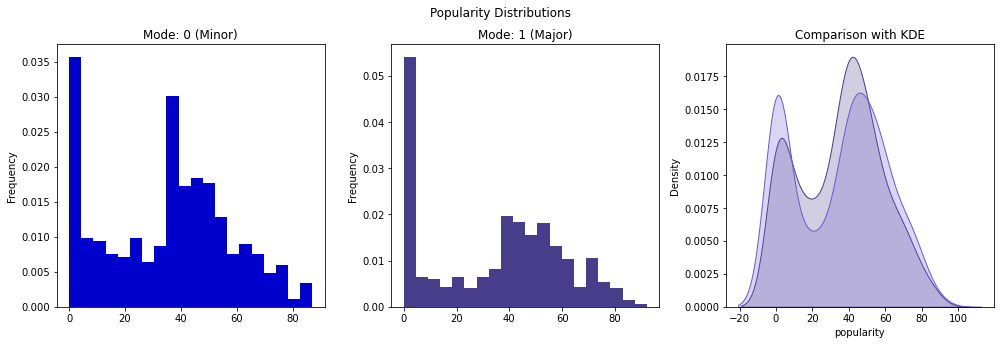

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
sample_1['popularity'].plot(kind="hist", ax=ax[0], bins=20, label="completed", color="mediumblue", density=True)
ax[0].set_title("Mode: 0 (Minor)")

sample_2['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="none", color="darkslateblue", density=True)
ax[1].set_title("Mode: 1 (Major)")

sns.kdeplot(sample_1['popularity'], shade=True, label="Target: 0", ax=ax[2], color="darkslateblue")
sns.kdeplot(sample_2['popularity'], shade=True, label="Target: 1", ax=ax[2], color="slateblue")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")

# To make a clearer layout for the graphs
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [51]:
from scipy import stats 

f_stats, p_values = stats.f_oneway(sample_1['popularity'].values, sample_2['popularity'].values)
p_values

0.6469354908770091

P Value shows that we must reject the alternative hypothesis

### Hypothesis 2

Hypothesis Test: Our purpose in this part is to examine the change in the features of the pop songs before and after 2010.

Null Hypothesis (): Means of danceability, popularity and acousticness samples for songs before the year 2010 have the same value with the means of the features of the songs that came after 2010 (e.g.  denotes mean of danceability for songs before 2010

Alternative Hypothesis (): Means of danceability, popularity and acousticness samples changed before and after the year 2010

Significance level: We are setting it as 0.05 for our this test too.

In [60]:
# Creating samples based on the year and the genre
song_data['genres'].fillna('pop')
sample_1 = song_data[song_data['year'] < 2010]
sample_1 = sample_1[sample_1['genres'].str.contains("pop",na=False)]

sample_2 = song_data[song_data['year'] >= 2010]
sample_2 = sample_2[sample_2['genres'].str.contains("pop", na=False)]

Ttest_indResult(statistic=-2.1600592742672533, pvalue=0.04063740374963476)
Ttest_indResult(statistic=-1.415582735615041, pvalue=0.1707498702846584)
Ttest_indResult(statistic=5.687758705052106, pvalue=1.1017618754249353e-05)


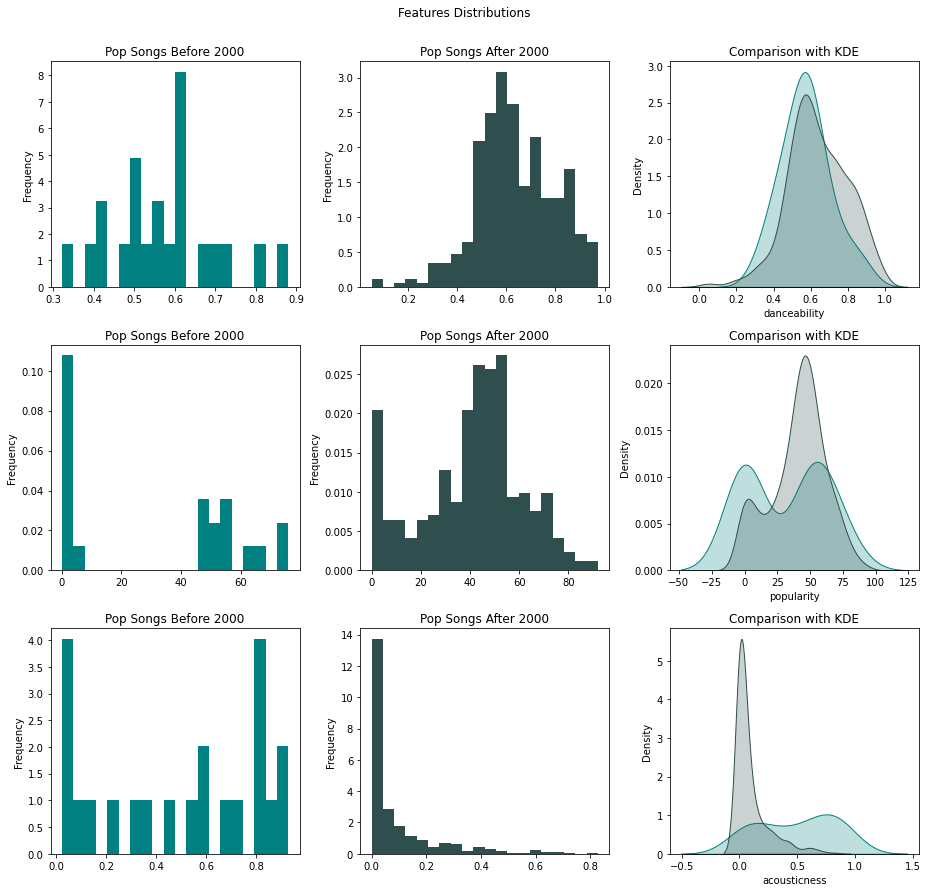

In [61]:
#we want to examine this three features
features = ['danceability', 'popularity', 'acousticness']

fig, ax = plt.subplots(3, 3, figsize=(13,13))

for i in range(len(features)):
  f = features[i]
  sample_1[f].plot(kind="hist", ax=ax[i][0], bins=20, label="completed", color="teal", density=True)
  ax[i][0].set_title("Pop Songs Before 2000")

  sample_2[f].plot(kind="hist", ax=ax[i][1], bins=20, label="none", color="darkslategray", density=True)
  ax[i][1].set_title("Pop Songs After 2000")

  sns.kdeplot(sample_1[f], shade=True, label="Target: 0", ax=ax[i][2], color="teal")
  sns.kdeplot(sample_2[f], shade=True, label="Target: 1", ax=ax[i][2], color="darkslategray")
  ax[i][2].set_title("Comparison with KDE")

  print(stats.ttest_ind(sample_1[f], sample_2[f], equal_var=False))  # since we have not equal variances


plt.suptitle("Features Distributions")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Machine Learning
Our purpose is using machine learning algorithms in order to guess the popularity of the songs according to the features of the songs, and to make a simple Spotify song recommendation system that takes song names and artist names as inputs from the user and recommends songs to the user according to his/her music taste.

### Preprocessing for Machine Learning
In this preprocessing for machine learning part, firstly , we copied our data from song_data to a new dataframe that is called as ml_data.

In [94]:
ml_data = song_data.copy() #create a new dataframe for machine learning
ml_data.head()

,track uri,name,artists,album name,album artist name(s),album release date,disc number,track number,duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
0,3WSmNiDHpz3hgFketPiIKW,Fatal (feat. Drew Ryn),"wasbak, maeva carter, drew ryn",Fatal (feat. Drew Ryn),"Wasback, Maeva Carter, Drew Ryn",2018-12-17,1,1,208129,False,...,-4.818,0,0.0777,0.063000,0.000,0.867,0.225,127.727,4,2018
1,53Zb7M5ImIsCQZsIyh6Qcn,Out Of This World,"Beatsole, Dan Thompson",Out Of This World,"Beatsole, Dan Thompson",2019-11-15,1,1,218186,False,...,-3.472,0,0.1310,0.009700,0.864,0.497,0.212,131.983,4,2019
2,4ZruxHVwyYmPBbskuWaFbX,Dream Like I Do,"Darren Porter, Ana Criado",Dream Like I Do,"Darren Porter, Ana Criado",2019-07-26,1,1,206029,False,...,-7.523,0,0.1570,0.001270,0.443,0.117,0.191,136.010,4,2019
3,0C8czD6DMKKPnPglj1HhrP,Character - Avao Remix,"Mark Sixma, Avao",The World of Six (Incl. Bonus Remixes),Mark Sixma,2020-01-24,1,5,180643,False,...,-5.370,1,0.0600,0.000933,0.907,0.149,0.217,200.991,3,2020
4,5rfqMfC6QWx65v1aXjFQQr,GDL,Allen Watts,GDL,Allen Watts,2020-01-03,1,1,172288,False,...,-4.400,0,0.1020,0.002040,0.928,0.587,0.117,137.963,4,2020


In [82]:
ml_data.size

34086

In [83]:
ml_data.shape

(1311, 26)

In [84]:
ml_data.columns

Index(['track uri', 'name', 'artists', 'album name', 'album artist name(s)',
       'album release date', 'disc number', 'track number', 'duration',
       'explicit', 'popularity', 'added at', 'genres', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time signature',
       'year'],
      dtype='object')

In [85]:
print("Is there null:")
for col in ml_data:
  check_for_nan = ml_data[col].isnull().values.any()
  print(col, " - ", check_for_nan)

Is there null:
track uri  -  False
name  -  False
artists  -  False
album name  -  False
album artist name(s)  -  False
album release date  -  False
disc number  -  False
track number  -  False
duration  -  False
explicit  -  False
popularity  -  False
added at  -  False
genres  -  False
danceability  -  False
energy  -  False
key  -  False
loudness  -  False
mode  -  False
speechiness  -  False
acousticness  -  False
instrumentalness  -  False
liveness  -  False
valence  -  False
tempo  -  False
time signature  -  False
year  -  False


In [86]:
ml_data.isna().sum()*100/ml_data.shape[0]

track uri               0.0
name                    0.0
artists                 0.0
album name              0.0
album artist name(s)    0.0
album release date      0.0
disc number             0.0
track number            0.0
duration                0.0
explicit                0.0
popularity              0.0
added at                0.0
genres                  0.0
danceability            0.0
energy                  0.0
key                     0.0
loudness                0.0
mode                    0.0
speechiness             0.0
acousticness            0.0
instrumentalness        0.0
liveness                0.0
valence                 0.0
tempo                   0.0
time signature          0.0
year                    0.0
dtype: float64

In [87]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track uri             1311 non-null   object 
 1   name                  1311 non-null   object 
 2   artists               1311 non-null   object 
 3   album name            1311 non-null   object 
 4   album artist name(s)  1311 non-null   object 
 5   album release date    1311 non-null   object 
 6   disc number           1311 non-null   int64  
 7   track number          1311 non-null   int64  
 8   duration              1311 non-null   int64  
 9   explicit              1311 non-null   bool   
 10  popularity            1311 non-null   int64  
 11  added at              1311 non-null   object 
 12  genres                1311 non-null   object 
 13  danceability          1311 non-null   float64
 14  energy                1311 non-null   float64
 15  key                  

In [97]:
ml_data = ml_data.drop(['track uri', 'explicit', 'album name', 'album artist name(s)', 'album release date', 'disc number', 'track number', 'added at', 'key'], axis =1)

In [98]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

ml_data["artists_encoded"] = encoder.fit_transform(ml_data[["artists"]])
ml_data.head()

,name,artists,duration,popularity,genres,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year,artists_encoded
0,Fatal (feat. Drew Ryn),"wasbak, maeva carter, drew ryn",208129,21,sky room,0.329,0.897,-4.818,0,0.0777,0.063000,0.000,0.867,0.225,127.727,4,2018,828.0
1,Out Of This World,"Beatsole, Dan Thompson",218186,32,"progressive house,progressive trance,russian t...",0.500,0.981,-3.472,0,0.1310,0.009700,0.864,0.497,0.212,131.983,4,2019,117.0
2,Dream Like I Do,"Darren Porter, Ana Criado",206029,41,"progressive trance,progressive uplifting tranc...",0.458,0.988,-7.523,0,0.1570,0.001270,0.443,0.117,0.191,136.010,4,2019,215.0
3,Character - Avao Remix,"Mark Sixma, Avao",180643,44,"dutch trance,pop dance,progressive house,progr...",0.367,0.822,-5.370,1,0.0600,0.000933,0.907,0.149,0.217,200.991,3,2020,466.0
4,GDL,Allen Watts,172288,33,"progressive house,progressive trance,progressi...",0.412,0.983,-4.400,0,0.1020,0.002040,0.928,0.587,0.117,137.963,4,2020,65.0


In [99]:
ml_data["genres_encoded"] = encoder.fit_transform(ml_data[["genres"]])
ml_data.head()

,name,artists,duration,popularity,genres,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year,artists_encoded,genres_encoded
0,Fatal (feat. Drew Ryn),"wasbak, maeva carter, drew ryn",208129,21,sky room,0.329,0.897,-4.818,0,0.0777,0.063000,0.000,0.867,0.225,127.727,4,2018,828.0,647.0
1,Out Of This World,"Beatsole, Dan Thompson",218186,32,"progressive house,progressive trance,russian t...",0.500,0.981,-3.472,0,0.1310,0.009700,0.864,0.497,0.212,131.983,4,2019,117.0,583.0
2,Dream Like I Do,"Darren Porter, Ana Criado",206029,41,"progressive trance,progressive uplifting tranc...",0.458,0.988,-7.523,0,0.1570,0.001270,0.443,0.117,0.191,136.010,4,2019,215.0,616.0
3,Character - Avao Remix,"Mark Sixma, Avao",180643,44,"dutch trance,pop dance,progressive house,progr...",0.367,0.822,-5.370,1,0.0600,0.000933,0.907,0.149,0.217,200.991,3,2020,466.0,317.0
4,GDL,Allen Watts,172288,33,"progressive house,progressive trance,progressi...",0.412,0.983,-4.400,0,0.1020,0.002040,0.928,0.587,0.117,137.963,4,2020,65.0,579.0


In [101]:
ml_data = ml_data.drop(["artists","genres","name"], axis=1)
ml_data.head()

,duration,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year,artists_encoded,genres_encoded
0,208129,21,0.329,0.897,-4.818,0,0.0777,0.063000,0.000,0.867,0.225,127.727,4,2018,828.0,647.0
1,218186,32,0.500,0.981,-3.472,0,0.1310,0.009700,0.864,0.497,0.212,131.983,4,2019,117.0,583.0
2,206029,41,0.458,0.988,-7.523,0,0.1570,0.001270,0.443,0.117,0.191,136.010,4,2019,215.0,616.0
3,180643,44,0.367,0.822,-5.370,1,0.0600,0.000933,0.907,0.149,0.217,200.991,3,2020,466.0,317.0
4,172288,33,0.412,0.983,-4.400,0,0.1020,0.002040,0.928,0.587,0.117,137.963,4,2020,65.0,579.0


### Machine Learning For Popularity Prediction
In order to make a prediction of the popularity of the songs according to their features we will use linear regression, random forest, and decision tree. We compared the real values of the popularities and the predicted values that are obtained by those machine learning algorithms.

#### Splitting The Data

In [102]:
#Split the dataset
from sklearn.model_selection import train_test_split

#train and test
train, test = train_test_split(ml_data, test_size=0.2, random_state=42)

#train and validation
train, val = train_test_split(train, test_size=0.2, random_state=42)


X_train = train.drop(["popularity"],axis=1)
Y_train = train["popularity"]

X_val = val.drop(["popularity"],axis=1)
Y_val = val["popularity"]

X_test = test.drop(["popularity"],axis=1)
Y_test = test["popularity"]

#X_train, X_test, Y_train, Y_test = train_test_split(ml_data, ml_data["popularity"], test_size=0.2, random_state=42)

print("Size of X_train:", X_train.size)
print("Size of X_test:" ,X_test.size)

Size of X_train: 12570
Size of X_test: 3945


In [103]:
X_train.head()

,duration,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year,artists_encoded,genres_encoded
698,126443,0.706,0.760,-4.702,1,0.0369,0.059900,0.000001,0.202,0.564,95.499,4,2020,824.0,512.0
1267,229714,0.491,0.948,-6.460,1,0.0536,0.000237,0.382000,0.321,0.404,139.975,4,2020,179.0,599.0
250,230654,0.563,0.793,-6.979,0,0.0845,0.008640,0.051500,0.346,0.347,128.011,4,2021,541.0,612.0
79,114700,0.477,0.825,-7.931,0,0.0447,0.000739,0.124000,0.844,0.115,131.981,4,2021,262.0,642.0
758,177600,0.546,0.822,-4.483,1,0.1510,0.014500,0.000000,0.742,0.615,150.060,4,2018,471.0,145.0


### Linear Regression

In [104]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

#### Popularity Against Danceability

In [105]:
l1 = ml_data["danceability"].values.reshape(-1,1)
y1 = ml_data["popularity"].values.reshape(-1,1)

In [106]:
l1_train, l1_test, y1_train, y1_test = train_test_split(l1, y1, random_state=42, test_size=0.2)

In [107]:
regr1 = linear_model.LinearRegression()
regr1.fit(l1_train, y1_train)

LinearRegression()

In [108]:
y1_pred = regr1.predict(l1_test)
y1_pred

array([[36.03291928],
       [35.85619506],
       [32.96623428],
       [36.09529254],
       [32.93504766],
       [36.12647916],
       [32.45685271],
       [34.99336505],
       [34.85822299],
       [31.17820099],
       [34.33844588],
       [36.78139833],
       [33.62115345],
       [37.18682449],
       [36.698234  ],
       [36.90614484],
       [35.35720903],
       [33.60036237],
       [37.86253474],
       [34.39042359],
       [34.1721172 ],
       [28.34333659],
       [36.07450145],
       [36.88535376],
       [33.25730947],
       [31.00147677],
       [32.29052403],
       [33.69392225],
       [34.49437901],
       [35.33641794],
       [34.68149877],
       [34.60872998],
       [33.43403369],
       [36.64625628],
       [32.72713681],
       [34.62952106],
       [33.87064647],
       [30.53367737],
       [32.45685271],
       [36.084897  ],
       [35.14929818],
       [33.11177188],
       [32.13459089],
       [35.65867976],
       [35.0557383 ],
       [33

#### The table below shows the actual and predicted values of popularity

In [110]:
df1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df1

,Actual,Predicted
0,71,36.032919
1,64,35.856195
2,51,32.966234
3,53,36.095293
4,14,32.935048
...,...,...
258,48,32.488039
259,0,37.082869
260,11,33.059794
261,58,34.629521


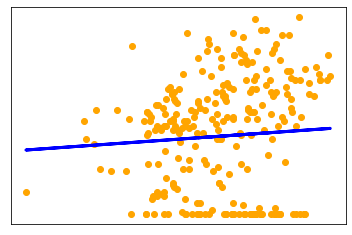

In [111]:
plt.scatter(l1_test, y1_test,  color='orange')
plt.plot(l1_test, y1_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [112]:
print('Coefficients: \n', regr1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))

Coefficients: 
 [[10.39554238]]
Mean squared error: 593.36
Coefficient of determination: 0.01


Predictions with the Linear Regression prediciton by danceability did not produce very sufficient results

#### Popularity Against Liveness

In [113]:
l2 = ml_data["liveness"].values.reshape(-1,1)
y2 = ml_data["popularity"].values.reshape(-1,1)

In [114]:
l2_train, l2_test, y2_train, y2_test = train_test_split(l2, y2, random_state=42, test_size=0.2)

In [115]:
regr2 = linear_model.LinearRegression()
regr2.fit(l2_train, y2_train)

LinearRegression()

In [116]:
y2_pred = regr2.predict(l2_test)
y2_pred

array([[32.67163909],
       [36.34908401],
       [36.02737691],
       [35.99964354],
       [35.86097669],
       [35.99964354],
       [35.5697763 ],
       [36.05511028],
       [36.13831039],
       [36.44892414],
       [32.82417263],
       [36.5695643 ],
       [32.56070561],
       [36.4378308 ],
       [30.02310221],
       [27.81829926],
       [36.05511028],
       [36.22151051],
       [36.16604376],
       [32.26950522],
       [32.43590544],
       [34.43270811],
       [36.11057702],
       [33.5036402 ],
       [31.89510472],
       [35.65297641],
       [35.73617652],
       [33.40657341],
       [36.60423102],
       [36.02737691],
       [36.05511028],
       [34.09990767],
       [32.76870589],
       [35.51430956],
       [35.9441768 ],
       [35.15377574],
       [31.27110388],
       [32.53297224],
       [24.89242868],
       [34.58524165],
       [36.0412436 ],
       [35.93031012],
       [36.60561769],
       [36.9176181 ],
       [36.28529726],
       [33

In [117]:
df2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
df2

,Actual,Predicted
0,71,32.671639
1,64,36.349084
2,51,36.027377
3,53,35.999644
4,14,35.860977
...,...,...
258,48,35.971910
259,0,37.045192
260,11,36.124444
261,58,35.694576


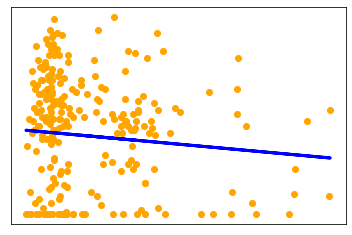

In [118]:
plt.scatter(l2_test, y2_test,  color='orange')
plt.plot(l2_test, y2_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [119]:
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y2_pred))

Coefficients: 
 [[-13.86668522]]
Mean squared error: 598.02
Coefficient of determination: 0.01


#### Popularity Against Acousticness

In [120]:
l3 = ml_data["acousticness"].values.reshape(-1,1)
y3 = ml_data["popularity"].values.reshape(-1,1)

In [121]:
l3_train, l3_test, y3_train, y3_test = train_test_split(l3, y3, random_state=42, test_size=0.2)

In [122]:
regr3 = linear_model.LinearRegression()
regr3.fit(l3_train, y3_train)

LinearRegression()

In [123]:
y3_pred = regr3.predict(l3_test)
y3_pred

array([[34.0335125 ],
       [37.04987887],
       [32.81747492],
       [38.91842441],
       [40.54969433],
       [34.58814427],
       [32.89755545],
       [37.73204629],
       [32.83675357],
       [33.59010368],
       [32.85899816],
       [33.16152458],
       [36.35288173],
       [36.30839255],
       [36.54566817],
       [32.71707768],
       [34.91439825],
       [40.38656734],
       [32.67540614],
       [32.67688912],
       [32.94204463],
       [32.6454894 ],
       [41.40981847],
       [39.60059183],
       [32.65513391],
       [32.82192384],
       [32.70803154],
       [32.64949861],
       [33.11110351],
       [32.66962255],
       [33.84072605],
       [32.66739809],
       [32.72404765],
       [34.32120919],
       [32.65639443],
       [32.71218387],
       [32.67481296],
       [32.69512968],
       [32.65154511],
       [32.73813589],
       [39.11121086],
       [32.65092227],
       [33.2416051 ],
       [33.49815937],
       [37.21300586],
       [33

In [124]:
df3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})
df3

,Actual,Predicted
0,71,34.033512
1,64,37.049879
2,51,32.817475
3,53,38.918424
4,14,40.549694
...,...,...
258,48,32.684897
259,0,32.965772
260,11,32.653176
261,58,32.921283


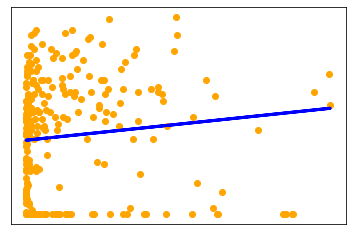

In [125]:
plt.scatter(l3_test, y3_test,  color='orange')
plt.plot(l3_test, y3_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [126]:
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y3_test, y3_pred))

Coefficients: 
 [[14.82972652]]
Mean squared error: 613.37
Coefficient of determination: -0.02


It is apparent that Linear Regression is not a good algorithm to use when predicting songs by features.

### Multiple Lineaer Regression

In [136]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(ml_data.drop(["popularity"], axis=1), ml_data["popularity"], test_size=0.2, random_state=42)


In [137]:
regressor = LinearRegression()  
regressor.fit(X_train_mlr, y_train_mlr)

LinearRegression()

In [138]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [139]:
coeff_df = pd.DataFrame(regressor.coef_, ml_data.drop(["popularity"], axis=1).columns, columns=['Coefficient'])  
coeff_df

,Coefficient
duration,0.000025
danceability,-11.373206
energy,-27.018519
loudness,1.686301
mode,-1.766541
speechiness,0.622943
acousticness,11.444624
instrumentalness,-2.169925
liveness,-8.980688
valence,15.233793


In [140]:
mlr_predicted = regressor.predict(X_train_mlr)

print('Mean Absolute Error of Multiple Linear Regression for training:', metrics.mean_absolute_error(y_train_mlr, mlr_predicted))
print('Mean Squared Error of Multiple Linear Regression for training:', metrics.mean_squared_error(y_train_mlr, mlr_predicted))
print('Root Mean Squared Error of Multiple Linear Regression for training:', np.sqrt(metrics.mean_squared_error(y_train_mlr, mlr_predicted)))
print('R-square score of Multiple Linear Regression for training: ', metrics.r2_score(y_train_mlr, mlr_predicted))

Mean Absolute Error of Multiple Linear Regression for training: 19.352929610846484
Mean Squared Error of Multiple Linear Regression for training: 527.6868052172567
Root Mean Squared Error of Multiple Linear Regression for training: 22.971434548526933
R-square score of Multiple Linear Regression for training:  0.11422514810640116


In [141]:
mlr_predicted_test = regressor.predict(X_test_mlr)


print('Mean Absolute Error of Multiple Linear Regression:', metrics.mean_absolute_error(y_test_mlr, mlr_predicted_test))
print('Mean Squared Error of Multiple Linear Regression:', metrics.mean_squared_error(y_test_mlr, mlr_predicted_test))
print('Root Mean Squared Error of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test_mlr, mlr_predicted_test)))
print('R-square score of Multiple Linear Regression: ', metrics.r2_score(y_test_mlr, mlr_predicted_test))

Mean Absolute Error of Multiple Linear Regression: 20.412743340765054
Mean Squared Error of Multiple Linear Regression: 565.0705512144867
Root Mean Squared Error of Multiple Linear Regression: 23.771212657634585
R-square score of Multiple Linear Regression:  0.06119949465082475


In [142]:
df4 = pd.DataFrame({'Actual': y_test_mlr, 'Predicted': mlr_predicted_test})
df5 = df4.head(15)
df5

,Actual,Predicted
1120,71,44.661726
1072,64,23.610183
198,51,30.279637
575,53,33.645319
331,14,46.224496
778,0,37.723527
175,39,22.557329
1176,73,41.960541
741,70,35.654061
346,46,45.954869


Charting the Real vs Predicted Values 

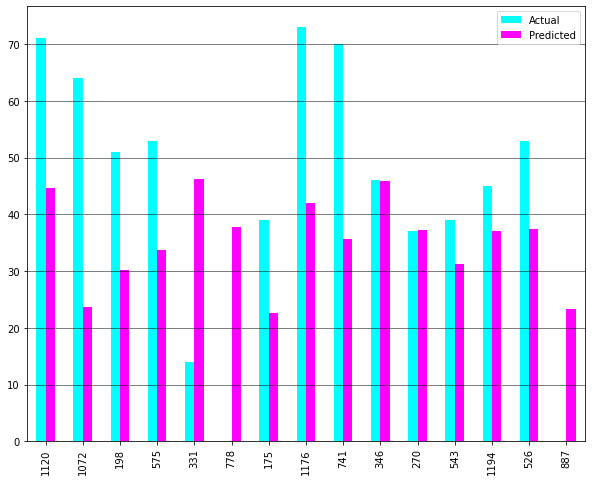

In [143]:
df5.plot(kind='bar',figsize=(10,8), colormap="cool")
plt.grid(axis="y", linestyle='-', linewidth='0.5', color='black')
plt.show()

So far Multiple Linear Regression is the best alorithm to use, but it's still too early to say for sure

### Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Random Forest Training
model_rf = RandomForestRegressor(random_state=42, max_depth=5)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [145]:
model_rf.feature_importances_

array([0.03060779, 0.04103189, 0.03745063, 0.04853751, 0.00043635,
       0.03314808, 0.02612362, 0.05276223, 0.01553129, 0.01186279,
       0.03110288, 0.00449667, 0.03084665, 0.43057674, 0.20548488])

We will use a bar chart to show the importance ranking of the features when trying to predict the popularity. 

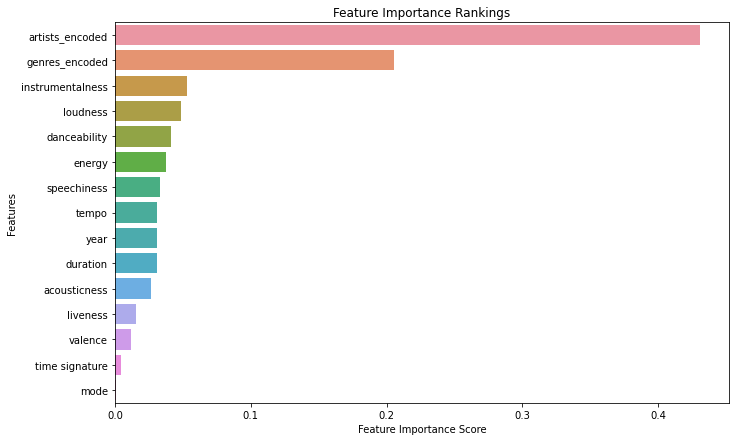

In [146]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(11, 7))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [147]:
#Random Forest Testing (with validation set)
rf_predictions = model_rf.predict(X_val)

mse = mean_squared_error(Y_val, rf_predictions)
mae = mean_absolute_error(Y_val, rf_predictions)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 380.95389642136774
mae: 14.91001772521133
rmse: 19.51804028127229


In [148]:
mse = []
mae = []
rmse = []

depth_range = range(4,24,2)

for i in depth_range:
  model_rf = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=i)
  model_rf.fit(X_train, Y_train)

  #Random Forest Testing (with validation set)
  rf_predictions = model_rf.predict(X_val)

  mse.append(mean_squared_error(Y_val, rf_predictions))
  mae.append(mean_absolute_error(Y_val, rf_predictions))
  rmse.append(np.sqrt(mse[-1]))

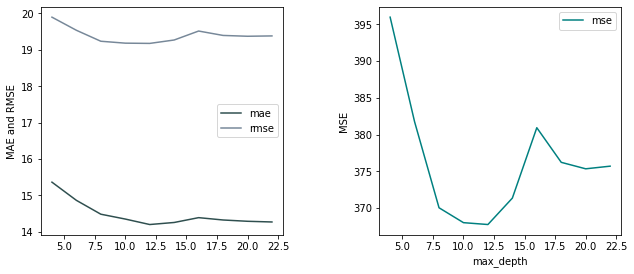

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, mae, color="darkslategray", label="mae")
plt.plot(depth_range, rmse, color = "lightslategray", label="rmse")
plt.ylabel("MAE and RMSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depth_range, mse, color="teal", label="mse")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout(pad=5)
plt.show()

### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regressor = DecisionTreeRegressor(random_state = 42, max_depth=15)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [151]:
y_pred = regressor.predict(X_test)

This table shows the real values of popularities against the predicted values.

In [152]:
da =pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
da

,Actual,Predicted
1120,71,46.000000
1072,64,34.000000
198,51,38.000000
575,53,0.000000
331,14,76.000000
...,...,...
209,48,48.833333
973,0,2.000000
140,11,9.000000
900,58,0.500000


In [153]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 18.735184682237914
Mean Squared Error: 739.5758793875472
Root Mean Squared Error: 27.19514440828633


This algorithm gives us the second lowest mean absolute error out of all our models.

Decision Tree Represented in Text Form

In [154]:
regr = DecisionTreeRegressor(max_depth=4, random_state=1234)
model = regr.fit(X_train, Y_train)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_13 <= 10.50
|   |--- feature_8 <= 0.08
|   |   |--- feature_4 <= 0.50
|   |   |   |--- value: [1.00]
|   |   |--- feature_4 >  0.50
|   |   |   |--- value: [2.00]
|   |--- feature_8 >  0.08
|   |   |--- feature_5 <= 0.54
|   |   |   |--- feature_1 <= 0.54
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_1 >  0.54
|   |   |   |   |--- value: [0.05]
|   |   |--- feature_5 >  0.54
|   |   |   |--- value: [1.00]
|--- feature_13 >  10.50
|   |--- feature_14 <= 563.50
|   |   |--- feature_7 <= 0.33
|   |   |   |--- feature_14 <= 392.00
|   |   |   |   |--- value: [39.08]
|   |   |   |--- feature_14 >  392.00
|   |   |   |   |--- value: [48.95]
|   |   |--- feature_7 >  0.33
|   |   |   |--- feature_0 <= 294597.00
|   |   |   |   |--- value: [33.99]
|   |   |   |--- feature_0 >  294597.00
|   |   |   |   |--- value: [18.00]
|   |--- feature_14 >  563.50
|   |   |--- feature_5 <= 0.28
|   |   |   |--- feature_5 <= 0.19
|   |   |   |   |--- value: [25.19]
|   |   |   |--

Decision Tree Represented in Graphical Form

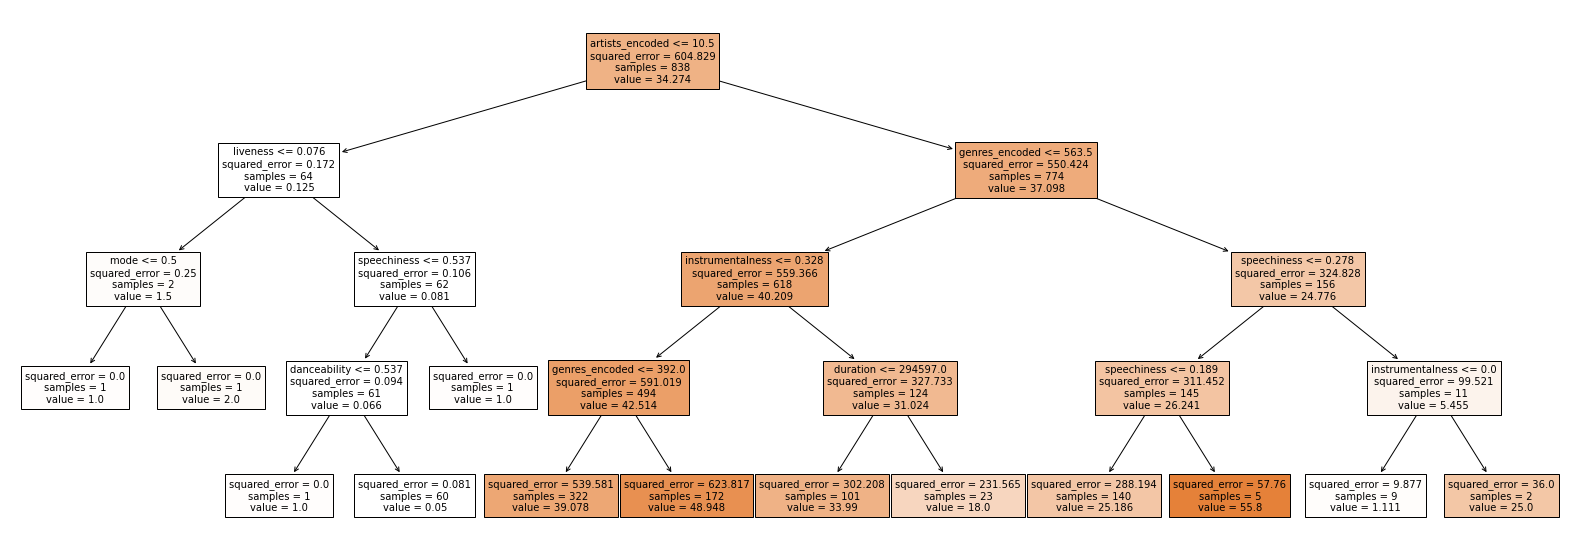

In [155]:
fig = plt.figure(figsize=(28,10), facecolor = "white" , edgecolor="orange")
a= tree.plot_tree(regr, feature_names= X_train.columns, filled=True, fontsize=10)

Let's Try Dropping some of the Training Attributes

In [156]:
X_removed = X_train.drop(["acousticness", "year", "energy"] , axis=1)
Y = Y_train
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_removed, Y, test_size=0.2, random_state=0)
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(x_train_2, y_train_2)
y_pred_2 = regressor.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

Mean Absolute Error: 17.922619047619047
Mean Squared Error: 630.6964285714286
Root Mean Squared Error: 25.113670153353304


Dropping the Features actually made our Mean Absolute Error better. 

In [157]:
mse = []
mae = []
rmse = []

depth_range = range(4,20,2)

for i in depth_range:
  model_dt = DecisionTreeRegressor(random_state=42, max_depth=i)
  model_dt.fit(X_train, Y_train)

  #Random Forest Testing (with validation set)
  rf_predictions = model_dt.predict(X_val)

  mse.append(mean_squared_error(Y_val, rf_predictions))
  mae.append(mean_absolute_error(Y_val, rf_predictions))
  rmse.append(np.sqrt(mse[-1]))

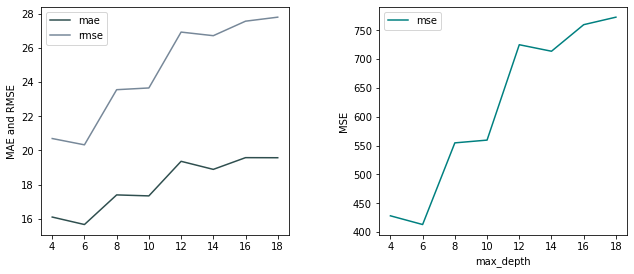

In [158]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, mae, color="darkslategray", label="mae")
plt.plot(depth_range, rmse, color = "lightslategray", label="rmse")
plt.ylabel("MAE and RMSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depth_range, mse, color="teal", label="mse")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout(pad=5)
plt.show()

### Machine Learning for Song Recommendation

make a recommendation system that takes the name of the artists and the songs from the user and recommends similar songs to the user according to the values of the features of the songs that the user gave as input. Using a Nearist Neighbors Algorithm 

In [172]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [187]:
key_arr = []
val_arr = []

n = 5

for i in range(n):
  k = input("Enter artist name: ")
  v = input("Enter song name: ")
  print()
  key_arr.append(k)
  val_arr.append(v)

Enter artist name: Protoculture
Enter song name: Go

Enter artist name: Danny Brown
Enter song name: Old

Enter artist name: Kodak Black
Enter song name: Dying to Live

Enter artist name: Lil Tecca
Enter song name: Ransom

Enter artist name: Juice WRLD
Enter song name: All Girls Are The Same



In [188]:
print(key_arr)
print(val_arr)

['Protoculture', 'Danny Brown', 'Kodak Black', 'Lil Tecca', 'Juice WRLD']
['Go', 'Old', 'Dying to Live', 'Ransom', 'All Girls Are The Same']


In [189]:
fav_songs_df = pd.DataFrame(columns=song_data.columns)

for i in range(n):
  song = song_data.loc[(song_data['name'] == val_arr[i]) & (song_data['artists'] == key_arr[i])]
  song = song.head(1)
  fav_songs_df = fav_songs_df.append(song)

In [190]:
fav_songs_df

,track uri,name,artists,album name,album artist name(s),album release date,disc number,track number,duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
45,3OePDv6zr5Ibz0HwERcefQ,Go,Protoculture,Go,Protoculture,2020-10-16,1,1,260952,False,...,-5.254,0,0.0394,0.00103,0.81200,0.1140,0.231,125.978,3,2020
1184,1kBbgxAUc4HQv7cgIayIDH,Ransom,Lil Tecca,Ransom,Lil Tecca,2019-06-04,1,1,131280,True,...,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974,4,2019
918,1dNyRyz1QBN9kO1etUs1PI,All Girls Are The Same,Juice WRLD,All Girls Are The Same,Juice WRLD,2018-04-13,1,1,169295,True,...,-9.727,1,0.2980,0.16900,0.00115,0.0731,0.216,161.925,4,2018


In [191]:
fav_songs_df = fav_songs_df.drop(["track uri","artists", "key", "album release date","popularity","duration", "name", "genres"], axis=1)


In [192]:
fav_songs_df = fav_songs_df.drop(["album name","album artist name(s)", "disc number", "track number","explicit","added at"], axis=1)


In [193]:
fav_songs_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,year
45,0.471,0.954,-5.254,0,0.0394,0.00103,0.81200,0.1140,0.231,125.978,3,2020
1184,0.745,0.642,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974,4,2019
918,0.673,0.449,-9.727,1,0.2980,0.16900,0.00115,0.0731,0.216,161.925,4,2018


In [194]:
feature_means = [[]]  
for i in fav_songs_df:
  feature_means[0].append(fav_songs_df[i].mean())
feature_means[0]

[0.6296666666666667,
 0.6816666666666666,
 -7.0793333333333335,
 0.3333333333333333,
 0.2081333333333333,
 0.06347666666666667,
 0.27105,
 0.0843,
 0.22433333333333336,
 155.959,
 3.6666666666666665,
 2019.0]

In [195]:
from sklearn.neighbors import NearestNeighbors

samples = song_data
samples = samples.drop(["track uri","artists", "key", "album release date","popularity","duration", "name", "genres","album name","album artist name(s)", "disc number", "track number","explicit","added at"], axis=1)

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(samples)

results = neigh.kneighbors(feature_means)
results

/home/corey/anaconda3/envs/forecastingEnv3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[1.41802199, 1.52646093, 2.22666021, 2.25326725, 2.27610156]]),
 array([[1132, 1235,  344,  978,  828]]))

In [196]:
for result in results[1][0]:
  res = song_data.loc[result]
  print(res["name"], "-", res["artists"])

Numb Numb Juice - ScHoolboy Q
All Da Way - Allday
Stars Tonight - Zeds Dead, DROELOE
Slow It Down - Fat Nick, BEXEY
BLEACH - BROCKHAMPTON
